In [2]:
from keras import backend as K
from keras import callbacks
import utils as ut
import genDat as gd
import numpy as np
from params import *
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, TimeDistributed, SimpleRNN, Input
from keras.utils import to_categorical
from keras import optimizers
from keras.models import load_model
import matplotlib.pyplot as plt
import scipy.stats

Using TensorFlow backend.
C:\Users\thaye_000\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\thaye_000\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\thaye_000\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\thaye_000\Anaconda3\lib\site-packages\

In [4]:
# Pinball loss for quantile tao
def pinball(y_true, y_pred):
    pin = K.mean(K.maximum(y_true - y_pred, 0) * tao +
                 K.maximum(y_pred - y_true, 0) * (1 - tao))
    return pin

In [7]:
model = load_model('my_model',custom_objects={'pinball':                   
pinball})

In [28]:
dat = gd.gen_batch(100, train_n, sigma_theta)
junk = ut.setup_nn_mat(dat)
batch_labels = junk["outcome"]
batch_data = junk["W"].reshape((100, train_n, 1))

In [29]:
preds = []
for i in range(1000):
    for j in range(100):
        np.random.shuffle(batch_data[j,:,0])
    preds.append(model.predict(batch_data))

In [30]:
np.var(preds, axis = 0)

array([[0.00051895],
       [0.00050475],
       [0.00066111],
       [0.00052812],
       [0.00068717],
       [0.00040442],
       [0.00067445],
       [0.00048667],
       [0.0004197 ],
       [0.00044912],
       [0.0004902 ],
       [0.00064325],
       [0.00041351],
       [0.00041939],
       [0.00036323],
       [0.00048077],
       [0.00044597],
       [0.00055965],
       [0.00053591],
       [0.00032725],
       [0.00054339],
       [0.00053628],
       [0.00034539],
       [0.00050571],
       [0.00042986],
       [0.00044433],
       [0.00061361],
       [0.00064378],
       [0.00059242],
       [0.00051708],
       [0.00035925],
       [0.00039341],
       [0.00032848],
       [0.00046936],
       [0.00047578],
       [0.00072617],
       [0.00050543],
       [0.00047911],
       [0.00048829],
       [0.00041984],
       [0.00056313],
       [0.00059781],
       [0.00055954],
       [0.00046257],
       [0.0004718 ],
       [0.00045908],
       [0.0005858 ],
       [0.000

In [20]:
np.shape(batch_data)

(100, 100, 1)

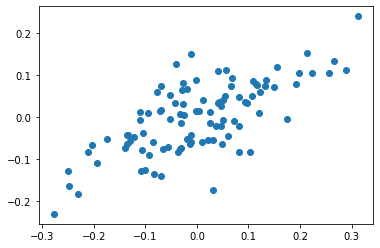

In [48]:
plt.scatter(batch_labels,np.mean(preds, axis = 0))


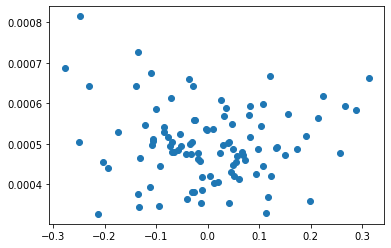

In [50]:
plt.scatter(batch_labels, np.var(preds,axis = 0))

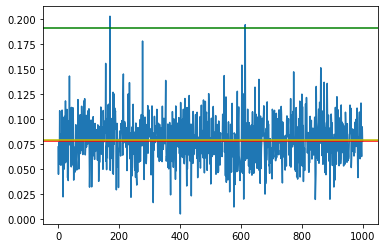

In [94]:
plt.plot([k[0] for k in preds])
plt.axhline(y=batch_labels[0], color='g', linestyle='-')
plt.axhline(y=0.5*np.mean(batch_data[0]), color='r', linestyle='-')
plt.axhline(y=np.mean([k[0] for k in preds]), color='y', linestyle='-')

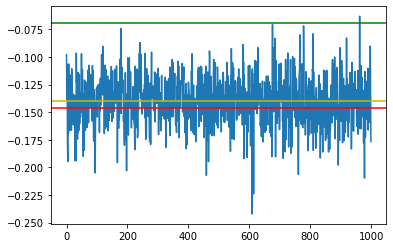

In [70]:
plt.plot([k[1] for k in preds])
plt.axhline(y=batch_labels[1], color='g', linestyle='-')
plt.axhline(y=0.5*np.mean(batch_data[1]), color='r', linestyle='-')
plt.axhline(y=np.mean([k[1] for k in preds]), color='y', linestyle='-')

In [77]:
loss_1 = []
for i in range(100):
    loss_1.append(np.mean(np.abs(batch_labels[i]- [k[i] for k in preds])))

In [ ]:
loss_2 = []
for i in range(100):
    loss_2.append(np.mean(np.abs(batch_labels[i]- np.mean([k[i] for k in preds]))))

In [90]:
loss_3 = np.abs(0.5*np.mean(batch_data, axis = 1)-batch_labels)

In [91]:
np.mean(loss_1)

0.07350998230115441

In [92]:
np.mean(loss_2)

0.0719509947469362

In [93]:
np.mean(loss_3)

0.07188977724187494